<a href="https://colab.research.google.com/github/mochradja/DataScience/blob/main/Data_LinearRegression_LondonWeather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('sample_data/london_weather.csv')
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [ ]:
df.isna().sum()

date                0
cloud_cover         0
sunshine            0
global_radiation    0
max_temp            0
mean_temp           0
min_temp            0
precipitation       6
pressure            0
snow_depth          0
dtype: int64

# snow depth clean

In [ ]:
df['snow_depth'].isna().value_counts()
run_nan = df['snow_depth'].isnull() == False
df['snow_depth'].loc[run_nan]

run = df['snow_depth'].loc[df['snow_depth'].isnull() == False]
run_mean = run.mean()

df['snow_depth'] = df['snow_depth'].fillna(run_mean)
df['snow_depth'].head()

0    9.0
1    8.0
2    4.0
3    2.0
4    1.0
Name: snow_depth, dtype: float64

# mean_temp clean

In [ ]:
df['mean_temp'].isna().value_counts()
run_mean = df['mean_temp'].isnull() == False
df['mean_temp'].loc[run_mean]

run = df['mean_temp'].loc[df['mean_temp'].isnull() == False]
run_temp = run.mean()

df['mean_temp'] = df['mean_temp'].fillna(run_temp)
df['mean_temp'].head()

0   -4.1
1   -2.6
2   -2.8
3   -2.6
4   -0.8
Name: mean_temp, dtype: float64

# cloud_cover clean

In [ ]:
df['cloud_cover'].isna().value_counts()
run_cloud = df['cloud_cover'].isnull() == False
df['cloud_cover'].loc[run_cloud]

run = df['cloud_cover'].loc[df['cloud_cover'].isnull() == False]
run_cover = run.mean()

df['cloud_cover'] = df['cloud_cover'].fillna(run_cover)
df['cloud_cover'].head()

0    2.0
1    6.0
2    5.0
3    8.0
4    6.0
Name: cloud_cover, dtype: float64

# global radiation clean

In [ ]:
df['global_radiation'].isna().value_counts()
run_global = df['global_radiation'].isnull() == False
df['global_radiation'].loc[run_global]

run = df['global_radiation'].loc[df['global_radiation'].isnull() == False]
run_radiation = run.mean()

df['global_radiation'] = df['global_radiation'].fillna(run_radiation)
df['global_radiation'].head()

0    52.0
1    27.0
2    13.0
3    13.0
4    29.0
Name: global_radiation, dtype: float64

# max_temp clean

In [ ]:
df['max_temp'].isna().value_counts()
run_max = df['max_temp'].isnull() == False
df['max_temp'].loc[run_max]

run = df['max_temp'].loc[df['max_temp'].isnull() == False]
run_temp = run.mean()

df['max_temp'] = df['max_temp'].fillna(run_temp)
df['max_temp'].head()

0    2.3
1    1.6
2    1.3
3   -0.3
4    5.6
Name: max_temp, dtype: float64

# min_temp clean

In [ ]:
df['min_temp'].isna().value_counts()
run_min = df['min_temp'].isnull() == False
df['min_temp'].loc[run_min]

run = df['min_temp'].loc[df['min_temp'].isnull() == False]
run_temp = run.mean()

df['min_temp'] = df['min_temp'].fillna(run_temp)
df['min_temp'].head()

0   -7.5
1   -7.5
2   -7.2
3   -6.5
4   -1.4
Name: min_temp, dtype: float64

# Pressure clean

In [ ]:
df['pressure'].isna().value_counts()
run_press = df['pressure'].isnull() == False
df['pressure'].loc[run_press]

run = df['pressure'].loc[df['pressure'].isnull() == False]
run_sure = run.mean()

df['pressure'] = df['pressure'].fillna(run_sure)
df['pressure'].head()

0    101900.0
1    102530.0
2    102050.0
3    100840.0
4    102250.0
Name: pressure, dtype: float64

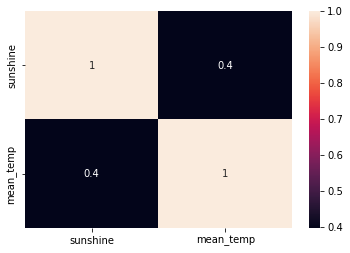

In [ ]:
sns.heatmap(df[['sunshine', 'mean_temp']].corr(), annot=True)

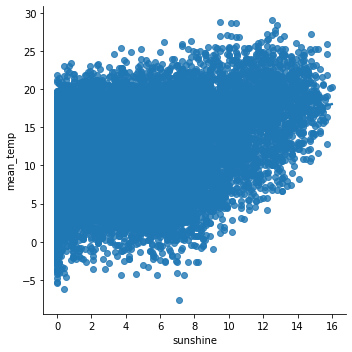

In [ ]:
sns.lmplot(x='sunshine', y='mean_temp', data=df)

In [ ]:
x = df[['sunshine', 'global_radiation', 'min_temp', 'max_temp']]
y = df[['mean_temp']]

In [ ]:
# Training data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=10)

In [ ]:
# Membuat model

from sklearn.linear_model import LinearRegression

otak = LinearRegression()
otak.fit(x_train, y_train)

LinearRegression()

In [ ]:
otak.intercept_, otak.coef_

(array([1.18407306]),
 array([[0.08661529, 0.00328254, 0.71881044, 0.26579783]]))

In [ ]:
x = 6.9
y = 0.08661529 + 1.18407306 * x
print(y)

In [ ]:
otak.predict([[5.7, 209.0, 13.8, 17.5]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[16.93487656]])

In [ ]:
y_pred = otak.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, c='y')
plt.xlabel('Promotion')
plt.ylabel('AgeOfStore')
plt.title('Plot Promotion dan AgeOfStore')

In [ ]:
otak.score(x_test, y_test)

-0.030037026959992774

In [ ]:
y_predict = otak.predict(x_test)

evaluasi = pd.DataFrame({
    'Actual': y_test.values.flatten(),
    'Predicted' : y_predict.flatten()
    })

evaluasi

,Actual,Predicted
0,17.3,16.934877
1,7.4,6.648333
2,6.3,5.767602
3,11.2,10.841719
4,16.6,16.353535
...,...,...
4598,21.4,21.187845
4599,6.9,6.956852
4600,14.4,14.418144
4601,12.2,13.387571


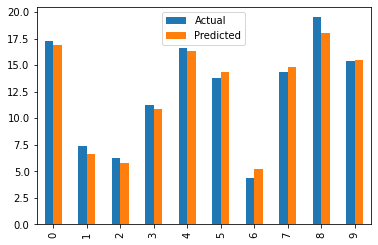

In [ ]:
evaluasi.head(10).plot(kind='bar')

In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error (y_test, y_predict))

0.8482261089446924


# Gradio

In [ ]:
pip install gradio

In [ ]:
import gradio as gr

def prediction(sunshine, global_radiation, min_temp, max_temp):
    y_pred=regressor.predict(x_test)
    # a data frame with actual and predicted values of y
    return otak.predict([[sunshine, global_radiation, min_temp, max_temp]])[0]

demo = gr.Interface(
    fn=prediction, 
    inputs=["number"] * 4,
    examples=x_test[:5].to_numpy().tolist(),
    outputs="number")

demo.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://32969.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<gradio.routes.App at 0x7f2c3f7f3ad0>,
 'http://127.0.0.1:7860/',
 'https://32969.gradio.app')